In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid19=pd.read_csv('C:/rfiles/covid19_data_mar.csv')

In [3]:
covid19.head()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,incubationdays,hospitaldays,visiting Wuhan,from Wuhan,death,recovered,symptom
0,195,NaN,1/27/2020,Hubei,China,female,28.0,1/7/2020,0.0,1/10/2020,NaN,NaN,#VALUE!,3,0,1,NaN,NaN,"fever, cough, difficult in breathing"
1,196,NaN,1/27/2020,Hubei,China,female,51.0,NaN,NaN,1/11/2020,NaN,NaN,#VALUE!,#VALUE!,0,1,NaN,NaN,"fever, cough, difficult in breathing"
2,197,NaN,1/27/2020,Shandong,China,male,37.0,NaN,NaN,1/17/2020,NaN,NaN,#VALUE!,#VALUE!,0,1,NaN,NaN,fever
3,237,1.0,1/15/2020,Kanagawa,Japan,male,35.0,1/3/2020,0.0,1/6/2020,NaN,1/6/2020,#VALUE!,3,1,0,NaN,1/15/2020,fever
4,241,5.0,1/28/2020,Aichi Prefecture,Japan,male,45.0,1/22/2020,0.0,1/26/2020,NaN,1/20/2020,#VALUE!,4,0,1,NaN,NaN,fever


In [4]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     270 non-null    int64  
 1   case_in_country        267 non-null    float64
 2   reporting date         270 non-null    object 
 3   location               270 non-null    object 
 4   country                270 non-null    object 
 5   gender                 269 non-null    object 
 6   age                    265 non-null    float64
 7   symptom_onset          252 non-null    object 
 8   If_onset_approximated  252 non-null    float64
 9   hosp_visit_date        214 non-null    object 
 10  exposure_start         32 non-null     object 
 11  exposure_end           79 non-null     object 
 12  incubationdays         270 non-null    object 
 13  hospitaldays           270 non-null    object 
 14  visiting Wuhan         270 non-null    int64  
 15  from W

In [5]:
#DATA CLEANING AND ANALYSIS.
covid19.isnull()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,incubationdays,hospitaldays,visiting Wuhan,from Wuhan,death,recovered,symptom
0,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False
1,False,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,False
2,False,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False
266,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
267,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False
268,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,False


In [6]:
covid19.isnull().sum()

id                         0
case_in_country            3
reporting date             0
location                   0
country                    0
gender                     1
age                        5
symptom_onset             18
If_onset_approximated     18
hosp_visit_date           56
exposure_start           238
exposure_end             191
incubationdays             0
hospitaldays               0
visiting Wuhan             0
from Wuhan                 0
death                    264
recovered                234
symptom                    0
dtype: int64

In [9]:
round(100*(covid19.isnull().sum()/len(covid19.index)),2)###calculating percentage of different columns having no value.

id                        0.00
case_in_country           1.11
reporting date            0.00
location                  0.00
country                   0.00
gender                    0.37
age                       1.85
symptom_onset             6.67
If_onset_approximated     6.67
hosp_visit_date          20.74
exposure_start           88.15
exposure_end             70.74
incubationdays            0.00
hospitaldays              0.00
visiting Wuhan            0.00
from Wuhan                0.00
death                    97.78
recovered                86.67
symptom                   0.00
dtype: float64

In [10]:
covid19['age'].describe()

count    265.000000
mean      53.301887
std       17.563936
min        4.000000
25%       43.000000
50%       55.000000
75%       65.000000
max       89.000000
Name: age, dtype: float64

In [15]:
###in age column replacing null values by mean value.
###doing this as mean is very near to median(50% or 2nd percentile).
covid19.loc[np.isnan(covid19['age']),['age']]=covid19['age'].mean()

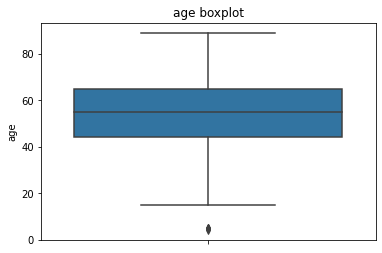

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=covid19['age'])
plt.title('age boxplot')
plt.show()##maximum population is in rnage of 50 to 60.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


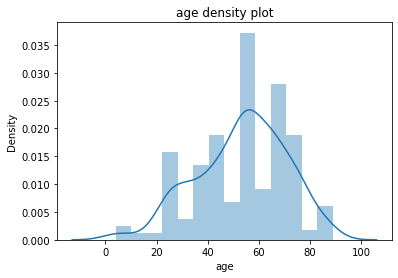

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(covid19['age'])
plt.title('age density plot')
plt.show()

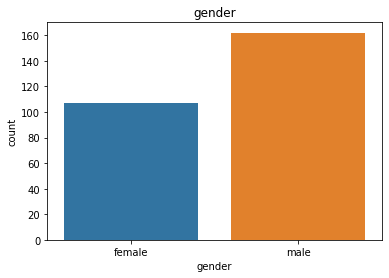

In [22]:
sns.countplot(x='gender',data=covid19)
plt.title('gender')
plt.show()###male more likely to be corona positive than female.

In [23]:
###incubationdays
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     270 non-null    int64  
 1   case_in_country        267 non-null    float64
 2   reporting date         270 non-null    object 
 3   location               270 non-null    object 
 4   country                270 non-null    object 
 5   gender                 269 non-null    object 
 6   age                    270 non-null    float64
 7   symptom_onset          252 non-null    object 
 8   If_onset_approximated  252 non-null    float64
 9   hosp_visit_date        214 non-null    object 
 10  exposure_start         32 non-null     object 
 11  exposure_end           79 non-null     object 
 12  incubationdays         270 non-null    object 
 13  hospitaldays           270 non-null    object 
 14  visiting Wuhan         270 non-null    int64  
 15  from W

In [27]:
covid19['incubationdays']=pd.to_numeric(covid19['incubationdays'],errors='coerce')
###above line converts object incubationdays to numeric.
####errors convert all non-numeric values to null.

In [26]:
covid19['incubationdays'].describe()

count    31.000000
mean     10.064516
std       8.053718
min      -1.000000
25%       5.500000
50%       8.000000
75%      11.000000
max      34.000000
Name: incubationdays, dtype: float64

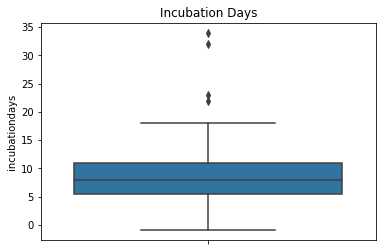

In [31]:
sns.boxplot(y=covid19['incubationdays'])
plt.title('Incubation Days')
plt.show()###most cases show incubation within 10 days so govt. has them as 14 days.
###some cases show incubation or symptoms after 20 days or more as seen from outliers.

In [32]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     270 non-null    int64  
 1   case_in_country        267 non-null    float64
 2   reporting date         270 non-null    object 
 3   location               270 non-null    object 
 4   country                270 non-null    object 
 5   gender                 269 non-null    object 
 6   age                    270 non-null    float64
 7   symptom_onset          252 non-null    object 
 8   If_onset_approximated  252 non-null    float64
 9   hosp_visit_date        214 non-null    object 
 10  exposure_start         32 non-null     object 
 11  exposure_end           79 non-null     object 
 12  incubationdays         31 non-null     float64
 13  hospitaldays           270 non-null    object 
 14  visiting Wuhan         270 non-null    int64  
 15  from W

In [34]:
covid19['hospitaldays']=pd.to_numeric(covid19['hospitaldays'],errors='coerce')###to convert hospital days object to numeric.

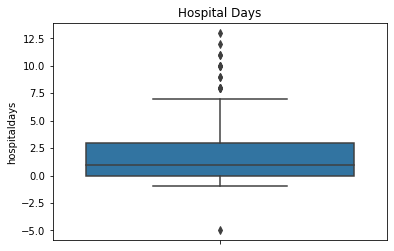

In [38]:
sns.boxplot(y=covid19['hospitaldays'])
plt.title('Hospital Days')
plt.show()##outliers may represent serious cases as hospital days is very much greater than mean.

In [37]:
covid19['hospitaldays'].describe()

count    200.00000
mean       2.17500
std        2.82565
min       -5.00000
25%        0.00000
50%        1.00000
75%        3.00000
max       13.00000
Name: hospitaldays, dtype: float64

In [39]:
####symptom
covid19['symptom'].astype('category').value_counts()

fever                                      73
fever, cough                               36
cough                                      14
fever, malaise                              7
fever, sore throat                          6
                                           ..
fever, abdominal pain, diarrhea             1
feve\                                       1
fatigue, muscle pain, joint pain, fever     1
fatigue, malaise, headache                  1
vomiting, diarrhea, fever, cough            1
Name: symptom, Length: 108, dtype: int64

In [42]:
covid19_symptoms=covid19.loc[(covid19['symptom']=='fever') | (covid19['symptom']=='fever, cough') | (covid19['symptom']=='fever, cough, malaise')
                              | (covid19['symptom']=='fever, malaise') | (covid19['symptom']=='cough'), :]

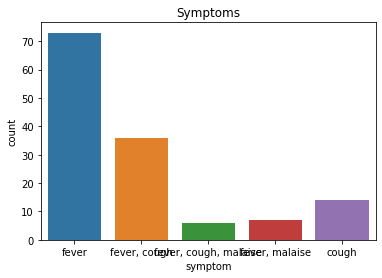

In [43]:
sns.countplot(x='symptom',data=covid19_symptoms)
plt.title("Symptoms")
plt.show()

In [46]:
###conclusion:------->
#age between 50 to 60 yrs is more affected.
#incubation period is around 10 days but there are some outliers with more than 20 days.
#Male patients more than Female.
#Most common symptoms are fever followed by fever,cough then cough then fever,malaise then cough,malaise.